<div style="display: flex; align-items: center; justify-content: center; text-align: center;">
  <img src="https://coursereport-s3-production.global.ssl.fastly.net/uploads/school/logo/219/original/CT_LOGO_NEW.jpg" width="100" style="margin-right: 10px;">
  <div>
    <h1><b>🧪 Lab - MPG Predictions</b></h1>
  </div>
</div>


## Part 1: Getting the data
The dataset provided in this repository (`./data/auto.csv`) consists of various descriptions of cars along with their miles per gallon (mpg). A data dictionary for this dataset can be found in the README.

**Read in the data and display the first 5 rows.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df_auto = pd.read_csv('auto.csv')

In [ ]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,1


In [ ]:
df_auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'origin'],
      dtype='object')

## Part 2: Data Cleaning

There are a few issues with this dataset. To help you identify and fix these issues, you are told:
- The `origin` column should not be a part of this dataset and you should drop it.
- Any null values in the `cylinders` column are clerical errors. They should all be 4's.
- All columns in this dataset should be numeric. If there are unknown values in any column other than the `cylinders` column, they should be dropped.

**Please clean up the dataset.**

In [ ]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,1


In [ ]:
df_auto.drop(columns ='origin', inplace= True)

In [ ]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8.0,307.0,130.0,3504.0,12.0
1,15.0,8.0,350.0,165.0,3693.0,11.5
2,18.0,8.0,318.0,150.0,3436.0,11.0
3,16.0,8.0,304.0,150.0,3433.0,12.0
4,17.0,8.0,302.0,140.0,3449.0,10.5


In [ ]:
df_auto.isna().sum()

,0
mpg,0
cylinders,204
displacement,0
horsepower,0
weight,0
acceleration,0


In [ ]:
df_auto['cylinders'] =  df_auto['cylinders'].fillna(0)

In [ ]:
df_auto.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0


In [ ]:
df_auto.dtypes

,0
mpg,float64
cylinders,float64
displacement,float64
horsepower,float64
weight,float64
acceleration,float64


In [ ]:

df_auto['horsepower']

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


In [ ]:
df_auto['horsepower'].value_counts()

,count
horsepower,
150.0,22
90.0,20
88.0,19
110.0,18
100.0,17
...,...
77.0,1
132.0,1
64.0,1


In [ ]:
# Can't convert string
df_auto['horsepower'] = pd.to_numeric(df_auto['horsepower'],errors='coerce')
df_auto['horsepower'] =  df_auto['horsepower'].fillna(0)

In [ ]:
# changing horsepower from object to int
#df_auto['horsepower'] = df_auto['horsepower'].str.replace("'","")
#df_auto['horsepower'] = df_auto['horsepower'].astype(float)

In [ ]:
df_auto.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0


## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the horsepower column
- A scatterplot of weight compared to acceleration colored orange with a title and axis labels

**Please display these.**

In [ ]:
df_auto['acceleration'].describe()

,acceleration
count,398.000000
mean,15.568090
std,2.757689
min,8.000000
25%,13.825000
50%,15.500000
75%,17.175000
max,24.800000


Text(0.5, 1.0, 'Weight vs acceleration Scatterplot')

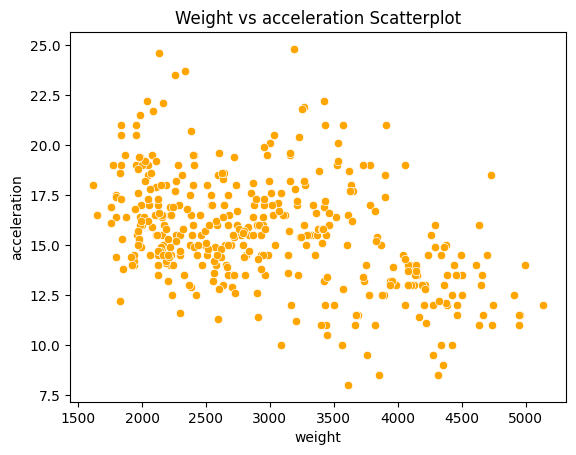

In [ ]:
sns.scatterplot(data=df_auto,
                x='weight',
                y='acceleration',
                color='orange')

plt.title('Weight vs acceleration Scatterplot')

## Part 4: Modeling

**Fit a linear regression model to predict the mpg. Use *all* columns (other than your target) in your model to predict the concrete compressive strength.**
* Please use a random state of `42` when splitting your data
* Use 85% of the dataset for training and the other 15% for testing

In [ ]:
df_auto.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0


In [ ]:
X = df_auto.drop(columns='mpg') # matrix and has to be a dataframe
y= df_auto['mpg'] # series

In [ ]:
# X & Y Split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,train_size=0.33 )

In [ ]:
# Define the Model we will be using
lr = LinearRegression()

In [ ]:
# Fit the model to the x training and y training
lr.fit(X_train,y_train)

LinearRegression()

## Part 5: Evaluation
### $R^2$ Score
---

Use `.score` to evaluate the $R^2$ score of our model.

In [ ]:
# Training r2 score
lr.score(X_train,y_train)

0.7159704457689665

In [ ]:
# Testing r2 score - use X_test and y_test
lr.score(X_test,y_test)

0.7138281603010346

In [ ]:
# Interpret the testing r2:

 # 72.3% of mpg

### RMSE Score
---

Use `mean_squared_error` to evaluate the RMSE score of our model.

`mean_squared_error` requires two parameters:
- `y_true` : The actual y values
- `y_pred` : Our model's predicted y values

Therefore, we need to use our model to make predictions first!

In [ ]:
# Make predictions on training set
train_predict = lr.predict(X_train)

In [ ]:
# Make predictions on test set
test_preds = lr.predict(X_test)

In [ ]:
# Calculate RMSE on training set
mean_squared_error(y_train, train_predict)

17.57663594267998

In [ ]:
# Calculate RMSE on testing set
mean_squared_error(y_test, test_preds)

17.291866596625407

## Part 6: How does this compare to our baseline?!
---
Remember, in regression tasks, calculating a baseline often involves using a simple and intuitive strategy, such as predicting the mean of the target variable for all instances. This baseline serves as a benchmark for model performance, and comparing the model's performance metrics, such as Root Mean Squared Error (RMSE), against this baseline helps assess the added value and predictive capability of the model over a straightforward, naively predicted baseline. If our model doesn't beat the baseline, why would we use a model?!

In [ ]:
# Putting it all together -- Calculate the baseline RMSE
y_test.mean()

np.float64(23.638576779026216)

In [ ]:
baseline_preds = np.full_like(y_test, y_test.mean())

In [ ]:
mean_squared_error(y_test, baseline_preds)

60.424766513767906

## Part 7: Interpretation

The hiring manager is especially interested in learning more about the effects of [horsepower](https://www.britannica.com/science/horsepower) on mpg.

**They ask you what effect the horsepower has on mpg. How would you respond? Be as specific as possible.**

> Interpretation: We found that 60% of horsepower effects on mpg, so vehicles that have more horsepower have a have a greater mpg.

> Overview: We are trying to predict correlation between mpg and horespower

> What I did on this lab
- Perform basic data cleaning and EDA
- Describe a dataset, including data types, missing values and basic descriptive statistics
- Fit, generate predictions for mpg, and evaluate a linear regression model
- Interpret the results and coefficients of a linear regression model